## Distribucion de los datos


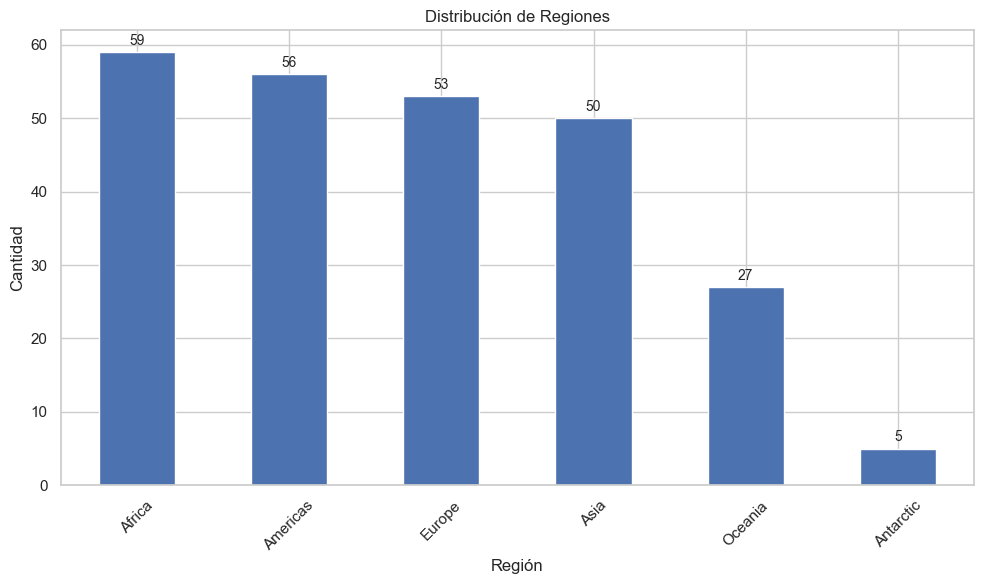

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV (reemplaza 'archivo.csv' con el nombre de tu archivo)
df = pd.read_csv('paises_con_lat_lon.csv')

# Contar la cantidad de ocurrencias por región
conteo_region = df['region'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10,6))
ax = conteo_region.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.title('Distribución de Regiones')
plt.xticks(rotation=45)

# Añadir cantidad total arriba de cada barra
for i, v in enumerate(conteo_region):
    ax.text(i, v + max(conteo_region)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## CSV Utilizado

In [43]:
import sys
import csv


sys.path.append('../src') 
from app import get_api_data
api = get_api_data()
records = []
for country in api:
    latlng = country.get("latlng", [None, None])
    lat = latlng[0] if len(latlng) > 0 else None
    lng = latlng[1] if len(latlng) > 1 else None

    record = {
        "name.common": country.get("name", {}).get("common", None),
        "independent": country.get("independent", None),
        "unMember": country.get("unMember", None),
        "capital": ", ".join(country.get("capital", [])) if country.get("capital") else None,
        "region": country.get("region", None),
        "subregion": country.get("subregion", None),
        "language": ", ".join(country.get("languages", {}).values()) if country.get("languages") else None,
        "latitude": lat,
        "longitude": lng,
        "landlocked": country.get("landlocked", None),
        "area": country.get("area", None),
        "population": country.get("population", None),
        "borders": ", ".join(country.get("borders", [])) if country.get("borders") else None,
        "car.side": country.get("car", {}).get("side", None),
        "timezones": ", ".join(country.get("timezones", [])) if country.get("timezones") else None,
        "continents": ", ".join(country.get("continents", [])) if country.get("continents") else None,
        "startOfWeek": country.get("startOfWeek", None)
    }
    records.append(record)

# Guardar en archivo CSV
with open("paises_con_lat_lon.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=records[0].keys())
    writer.writeheader()
    writer.writerows(records)

print("✅ Archivo CSV generado: paises_con_lat_lon.csv")


✅ Archivo CSV generado: paises_con_lat_lon.csv


## Primer intento de clustering

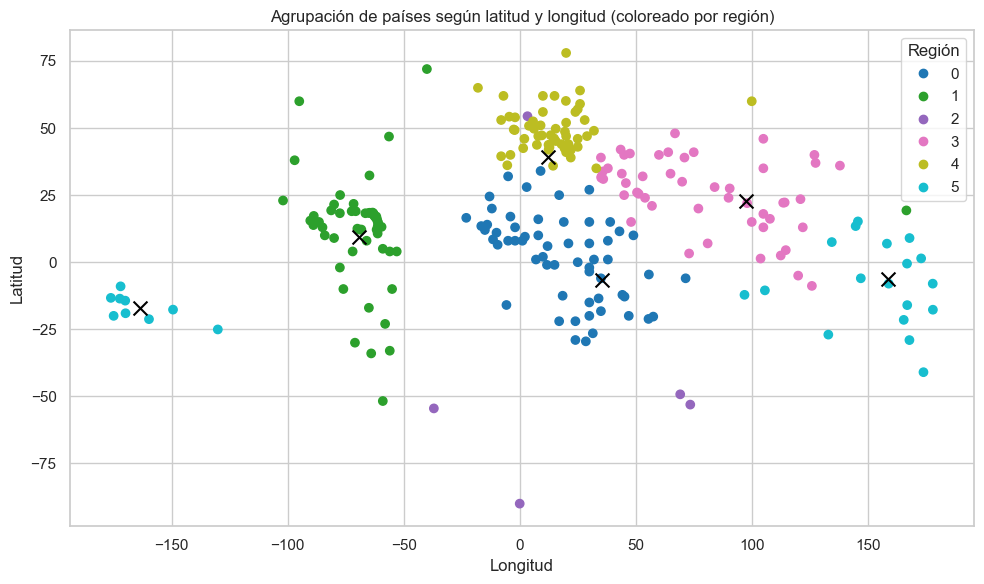

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el archivo CSV
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X como latitud y longitud
X_lat_lon = df[['latitude', 'longitude']].copy()

# Mapear regiones a valores numéricos específicos
region_map = {
    'Africa': 0,
    'Americas': 1,
    'Antarctic': 2,
    'Asia': 3,
    'Europe': 4,
    'Oceania': 5
}
y_lat_lon = df['region'].map(region_map)

# Entrenar KMeans con 6 clusters (una por cada región esperada)
kmeans_lat_lon = KMeans(n_clusters=6, random_state=20)
kmeans_lat_lon.fit(X_lat_lon)
clusters = kmeans_lat_lon.labels_

# Graficar resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_lat_lon['longitude'], X_lat_lon['latitude'], c=y_lat_lon, cmap='tab10', label=y_lat_lon)
plt.scatter(kmeans_lat_lon.cluster_centers_[:, 1], kmeans_lat_lon.cluster_centers_[:, 0], 
            c='black', marker='x', s=100, label='Centroides')
plt.title('Agrupación de países según latitud y longitud (coloreado por región)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(*scatter.legend_elements(), title="Región")
plt.grid(True)
plt.tight_layout()
plt.show()


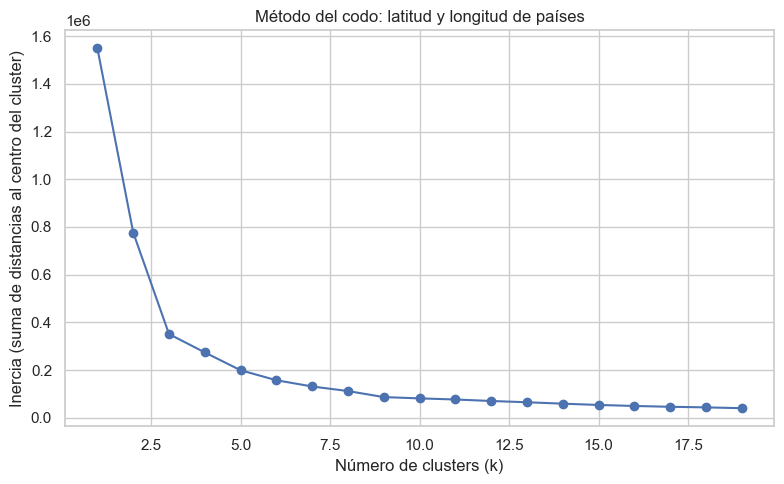

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Vuelvo a cargar el archivo porque el entorno se reinició
csv_path = "paises_con_lat_lon.csv"

# Intentar cargar el archivo nuevamente
df = pd.read_csv(csv_path)

    # Usamos solo latitud y longitud para X
X_lat_lon = df[['latitude', 'longitude']].copy()

    # Método del codo
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans_lat_lon = KMeans(n_clusters=k, random_state=20)
    kmeans_lat_lon.fit(X_lat_lon)
    inertia.append(kmeans_lat_lon.inertia_)

    # Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo: latitud y longitud de países')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (suma de distancias al centro del cluster)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Intento fallido de poblacion vs independencia

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X y y
X = df[['independent', 'population']].copy()
y = df['unMember'].astype(int)  # Convertir True/False a 1/0

# Codificar la columna 'independent' (True/False -> 1/0)
X['independent'] = X['independent'].astype(int)

# Verificar el resultado
print(X.head())
print(y.head())


   independent  population
0            1     3278292
1            1     4314768
2            1      105697
3            1      869595
4            1    10353442
0    1
1    1
2    1
3    1
4    1
Name: unMember, dtype: int64


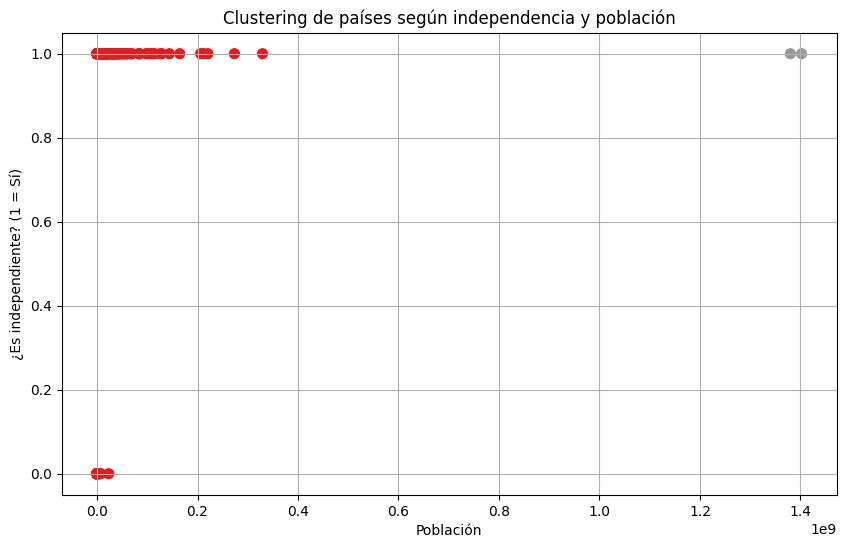

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X (independent, population) y codificar
X = df[['independent', 'population']].copy()
X['independent'] = X['independent'].astype(int)

# Definir y (miembro de la ONU)
y = df['unMember'].astype(int)

# Aplicar K-means con 2 clústeres (porque hay dos valores posibles en y)
kmeans = KMeans(n_clusters=2, random_state=20)
clusters = kmeans.fit_predict(X)

# Agregar los resultados al DataFrame
df['cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X['population'], X['independent'], c=clusters, cmap='Set1', s=50)
plt.xlabel('Población')
plt.ylabel('¿Es independiente? (1 = Sí)')
plt.title('Clustering de países según independencia y población')
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

# y_real = datos reales de membresía ONU
y_real = y.values

# y_cluster = etiquetas del clustering
y_cluster = clusters

# Comparar directamente
acc1 = accuracy_score(y_real, y_cluster)

# Comparar con etiquetas invertidas (porque KMeans puede asignar 0 y 1 al revés)
acc2 = accuracy_score(y_real, 1 - y_cluster)

# Elegir la mejor coincidencia
mejor_accuracy = max(acc1, acc2)

print(f"Precisión del clustering comparado con 'unMember': {mejor_accuracy:.2%}")


Precisión del clustering comparado con 'unMember': 76.00%


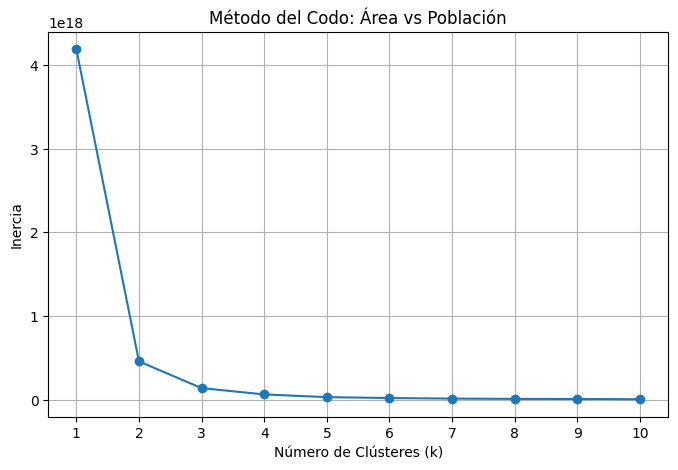

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("paises_con_lat_lon.csv")

# Definir X con las columnas 'area' y 'population'
X = df[['area', 'population']].dropna()

# Aplicar el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo: Área vs Población')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


## K-Means

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Cargar el CSV
df = pd.read_csv('paises_con_lat_lon.csv')

# Convertir booleanos a enteros
df['independent'] = df['independent'].astype(int)
df['landlocked'] = df['landlocked'].astype(int)

# Codificar 'car.side' (left/right) a números
le_car = LabelEncoder()
df['car.side'] = le_car.fit_transform(df['car.side'])

# Codificar 'region' (texto) a números
le_region = LabelEncoder()
df['region'] = le_region.fit_transform(df['region'])

# Verificación rápida
print("Codificación 'car.side':\n", df[['car.side']].drop_duplicates())
print("Codificación 'region':\n", df[['region']].drop_duplicates())

# Seleccionar features y target
X = df[['latitude', 'longitude','independent','area', 'population','car.side', 'landlocked','unMember']].values
y = df['region'].values  # Ahora es numérico gracias al LabelEncoder

# Confirmar que todo es numérico
print(pd.DataFrame(X).info())


Codificación 'car.side':
    car.side
0         1
2         0
Codificación 'region':
     region
0        3
1        1
2        5
3        0
4        4
41       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       250 non-null    object
 1   1       250 non-null    object
 2   2       250 non-null    object
 3   3       250 non-null    object
 4   4       250 non-null    object
 5   5       250 non-null    object
 6   6       250 non-null    object
 7   7       250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB
None


In [73]:
X

array([[46.0, 105.0, 1, ..., 1, 1, True],
       [9.0, -80.0, 1, ..., 1, 0, True],
       [-20.0, -175.0, 1, ..., 0, 0, True],
       ...,
       [18.5, -63.41666666, 0, ..., 1, 0, False],
       [35.0, 105.0, 1, ..., 1, 0, True],
       [7.5, 134.5, 1, ..., 1, 0, True]], shape=(250, 8), dtype=object)

In [74]:
y

array([3, 1, 5, 0, 4, 0, 5, 3, 5, 0, 5, 0, 3, 3, 3, 3, 0, 0, 0, 4, 1, 0,
       4, 3, 0, 5, 1, 4, 3, 3, 3, 4, 3, 1, 4, 3, 5, 3, 4, 5, 1, 2, 4, 3,
       0, 0, 0, 5, 0, 3, 0, 1, 1, 4, 1, 4, 0, 3, 0, 4, 4, 4, 4, 4, 2, 4,
       4, 5, 0, 0, 0, 1, 0, 4, 0, 0, 4, 3, 0, 5, 4, 3, 0, 5, 4, 5, 1, 1,
       4, 3, 3, 5, 1, 4, 3, 1, 4, 3, 2, 4, 3, 3, 0, 1, 0, 2, 3, 4, 3, 1,
       3, 1, 1, 1, 0, 1, 3, 4, 4, 0, 1, 1, 4, 3, 3, 1, 1, 3, 4, 5, 4, 5,
       0, 5, 1, 0, 5, 1, 0, 3, 4, 0, 3, 5, 4, 4, 3, 1, 4, 0, 5, 4, 0, 0,
       1, 1, 1, 0, 4, 0, 1, 4, 3, 0, 0, 1, 1, 4, 1, 0, 5, 4, 1, 1, 1, 4,
       1, 1, 4, 1, 5, 5, 1, 3, 1, 1, 0, 3, 1, 0, 3, 0, 4, 0, 4, 5, 3, 0,
       2, 1, 1, 0, 0, 3, 0, 1, 3, 5, 0, 0, 1, 3, 3, 3, 0, 5, 3, 4, 1, 1,
       1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 4, 3, 4, 0, 4, 4, 4, 4, 0, 3, 5, 0,
       4, 1, 0, 3, 4, 1, 3, 5])

# Matriz Correlacion, Método del Codo y Cluster de Paises

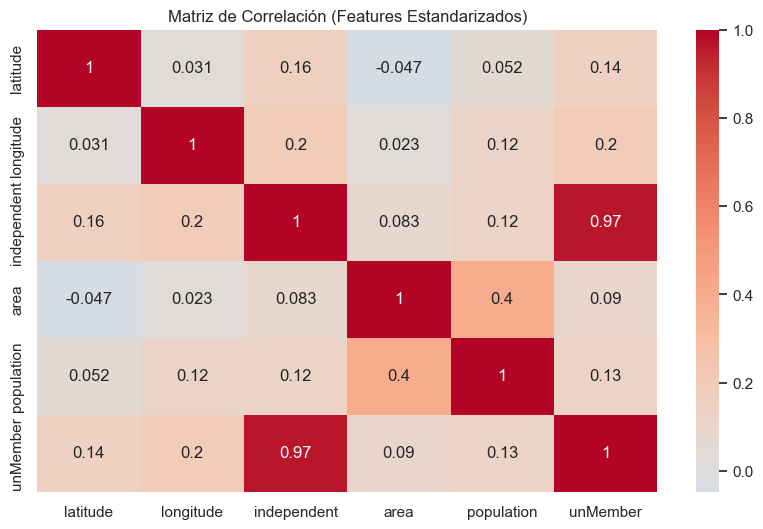

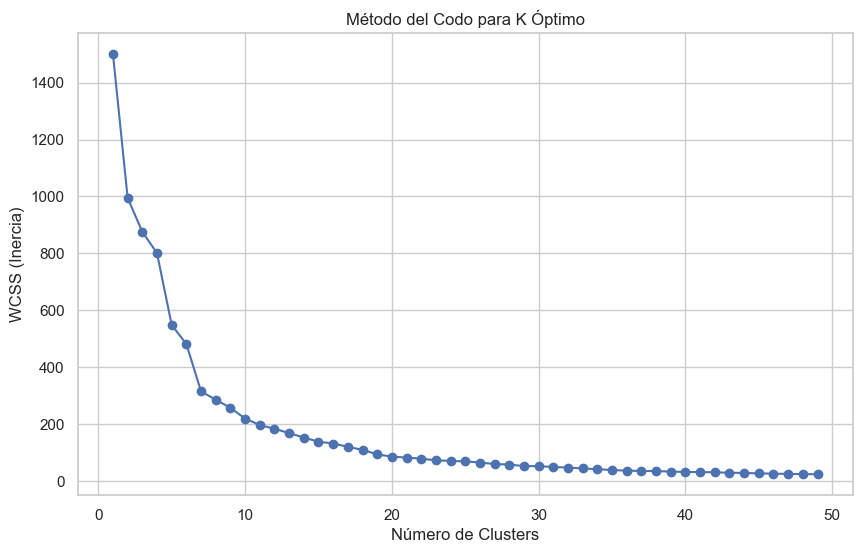

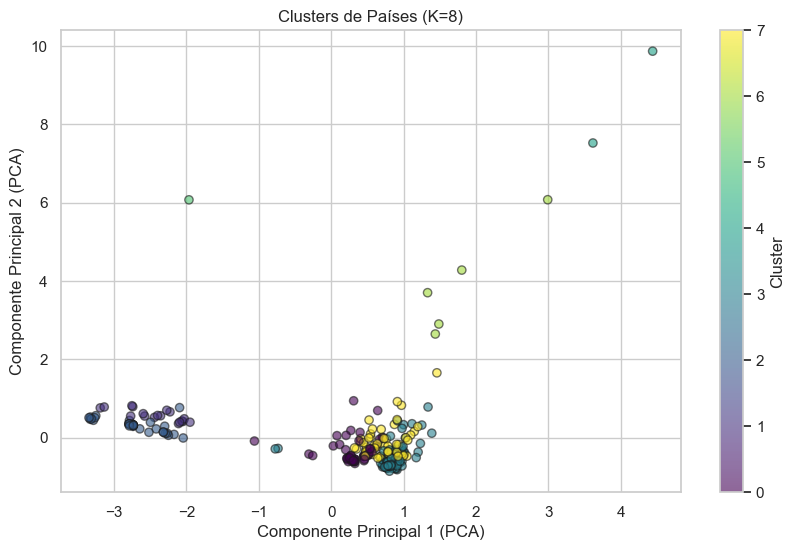

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('paises_con_lat_lon.csv')

# Codificar variables categóricas
le = LabelEncoder()
categorical_cols = ['independent', 'car.side', 'landlocked', 'region']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Selección de features basada en correlación (excluyendo redundancias)
features = ['latitude', 'longitude', 'independent', 'area', 'population', 'unMember']
X = df[features]

# Estandarizar datos (KMeans es sensible a escalas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análisis de correlación
corr_matrix = pd.DataFrame(X_scaled, columns=features).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Features Estandarizados)")
plt.show()

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determinar número óptimo de clusters (Método del Codo)
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inercia)')
plt.title('Método del Codo para K Óptimo')
plt.grid(True)
plt.show()

# Clustering con K óptimo (ejemplo: 8 clusters)
kmeans = KMeans(n_clusters=8, random_state=0)
y_pred = kmeans.fit_predict(X_scaled)

# Gráfico de clusters en 2D (PCA)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel('Componente Principal 1 (PCA)')
plt.ylabel('Componente Principal 2 (PCA)')
plt.title('Clusters de Países (K=8)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



Pesos de las variables en cada componente principal:

Pesos de las variables en cada componente principal:
                  PC1       PC2
latitude     0.264359 -0.194835
longitude    0.368156  0.032723
independent  0.942326 -0.231260
area         0.257506  0.799741
population   0.345080  0.753492
unMember     0.941362 -0.221564


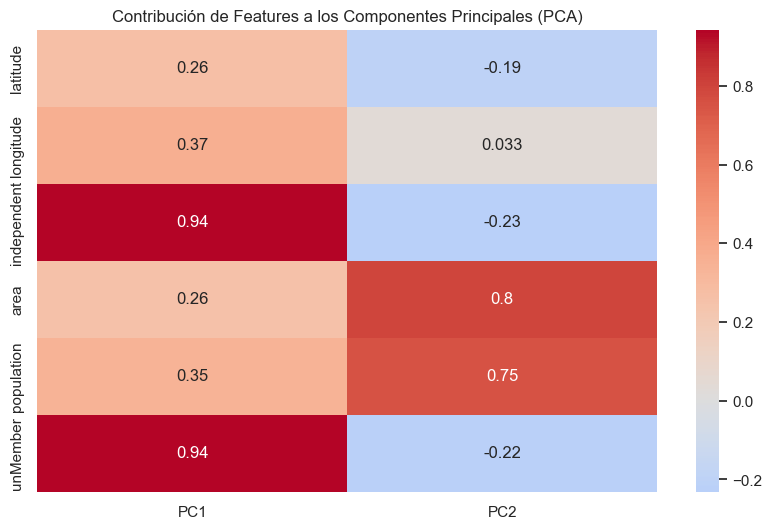

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y preprocesar datos (ejemplo)
df = pd.read_csv('paises_con_lat_lon.csv')

# Codificar variables categóricas
le = LabelEncoder()
categorical_cols = ['independent', 'car.side', 'landlocked', 'region']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Selección de features y escalado
features = ['latitude', 'longitude', 'independent', 'area', 'population', 'unMember']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtener los pesos (loadings) de cada feature en los componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para visualización
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)
print("Pesos de las variables en cada componente principal:")
print(loadings_df)

# Heatmap de los pesos
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title("Contribución de Features a los Componentes Principales (PCA)")
plt.show()


Ejecutamos k-means y le indicamos que queremos que divida los datos en 8 clusters:

In [77]:
from sklearn.cluster import KMeans

random_state = 40  # Puedes usar cualquier número entero


kmeans = KMeans(n_clusters=8, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 6, 4, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 5, 3, 3, 3, 3, 7, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 6, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 6, 0, 3, 3, 3, 3, 0, 3, 0, 3, 4, 3, 7, 3, 0, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 6, 0, 3, 3, 6, 3, 3, 3, 1, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 6, 6, 3, 3, 3, 3, 6, 4, 3, 4, 3, 0, 3, 6, 0,
       0, 0, 3, 0, 3, 3, 6, 3, 3, 0, 6, 3, 3, 3, 0, 3, 3, 3, 3, 5, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 7, 2, 3, 6, 3, 3, 3, 3, 0, 3, 3, 6, 3, 6, 3, 3, 0, 3, 3, 3,
       3, 3, 4, 6, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 7, 3, 0,
       3, 3, 4, 3, 3, 3, 1, 3], dtype=int32)

Centroides del modelo

In [78]:
kmeans.cluster_centers_

array([[1.30478270e+01, 2.29979378e+01, 9.72972973e-01, 1.04887338e+06,
        2.47751696e+07, 9.72972973e-01],
       [2.75000000e+01, 9.10000000e+01, 1.00000000e+00, 6.49727550e+06,
        1.39105819e+09, 1.00000000e+00],
       [1.00000000e+01, 7.66666667e+00, 1.00000000e+00, 3.44048233e+06,
        2.13197109e+08, 1.00000000e+00],
       [1.66517988e+01, 7.44932870e+00, 6.93181818e-01, 1.90219731e+05,
        3.08592222e+06, 6.76136364e-01],
       [2.32708333e+01, 5.24791667e+01, 1.00000000e+00, 9.89255500e+05,
        9.80247400e+07, 1.00000000e+00],
       [1.65000000e+01, 1.15000000e+01, 1.00000000e+00, 5.63858950e+06,
        3.01503872e+08, 1.00000000e+00],
       [1.95462963e+01, 2.78518519e+01, 1.00000000e+00, 8.75770889e+05,
        5.25245758e+07, 1.00000000e+00],
       [3.57500000e+01, 5.65000000e+01, 1.00000000e+00, 4.89702925e+06,
        1.40890559e+08, 1.00000000e+00]])

Asignaciones o labels

In [79]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 6, 4, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 5, 3, 3, 3, 3, 7, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 6, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 6, 0, 3, 3, 3, 3, 0, 3, 0, 3, 4, 3, 7, 3, 0, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 6, 0, 3, 3, 6, 3, 3, 3, 1, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 6, 6, 3, 3, 3, 3, 6, 4, 3, 4, 3, 0, 3, 6, 0,
       0, 0, 3, 0, 3, 3, 6, 3, 3, 0, 6, 3, 3, 3, 0, 3, 3, 3, 3, 5, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 7, 2, 3, 6, 3, 3, 3, 3, 0, 3, 3, 6, 3, 6, 3, 3, 0, 3, 3, 3,
       3, 3, 4, 6, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 7, 3, 0,
       3, 3, 4, 3, 3, 3, 1, 3], dtype=int32)

Error del resultado actual

In [80]:
kmeans.inertia_

1.0640655448574222e+16

Cuantos datos quedaron en cada cluster

In [81]:
counts = np.bincount(y_pred)
print(counts)

[ 37   2   3 176   8   2  18   4]


# Visualizacion de Clusters

In [86]:
from sklearn.cluster import KMeans

random_state=40

kmeans = KMeans(n_clusters=8, random_state=random_state).fit(X_scaled)

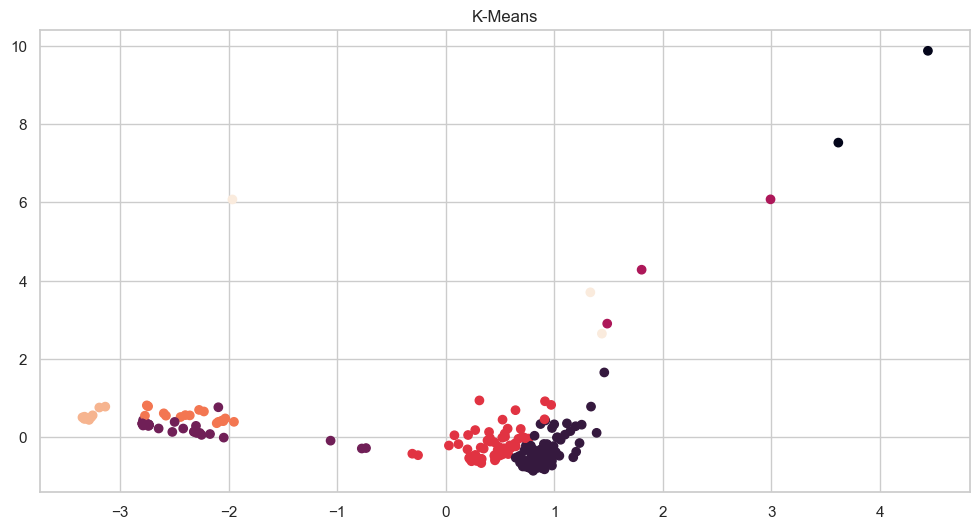

In [83]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

Centroides en el grafico

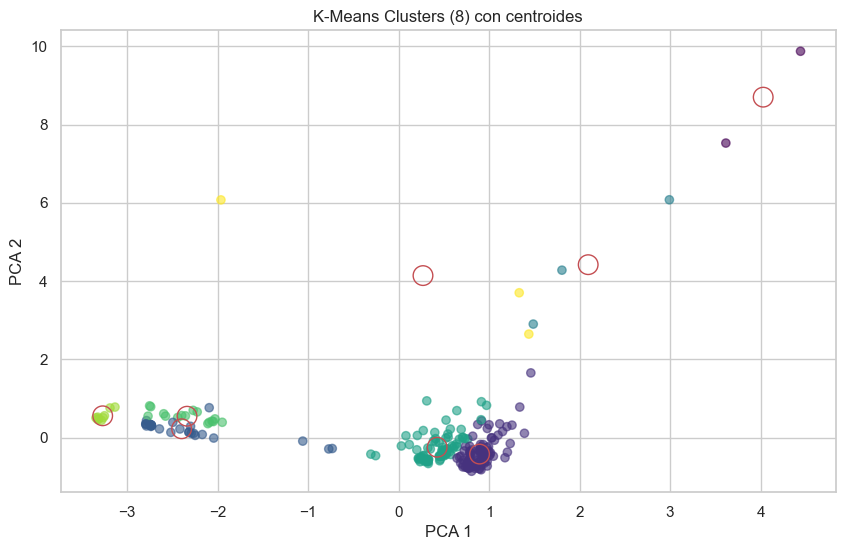

In [87]:
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means Clusters (8) con centroides")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Clustering Jerárquico Aglomerativo (Herarchical Clustering)

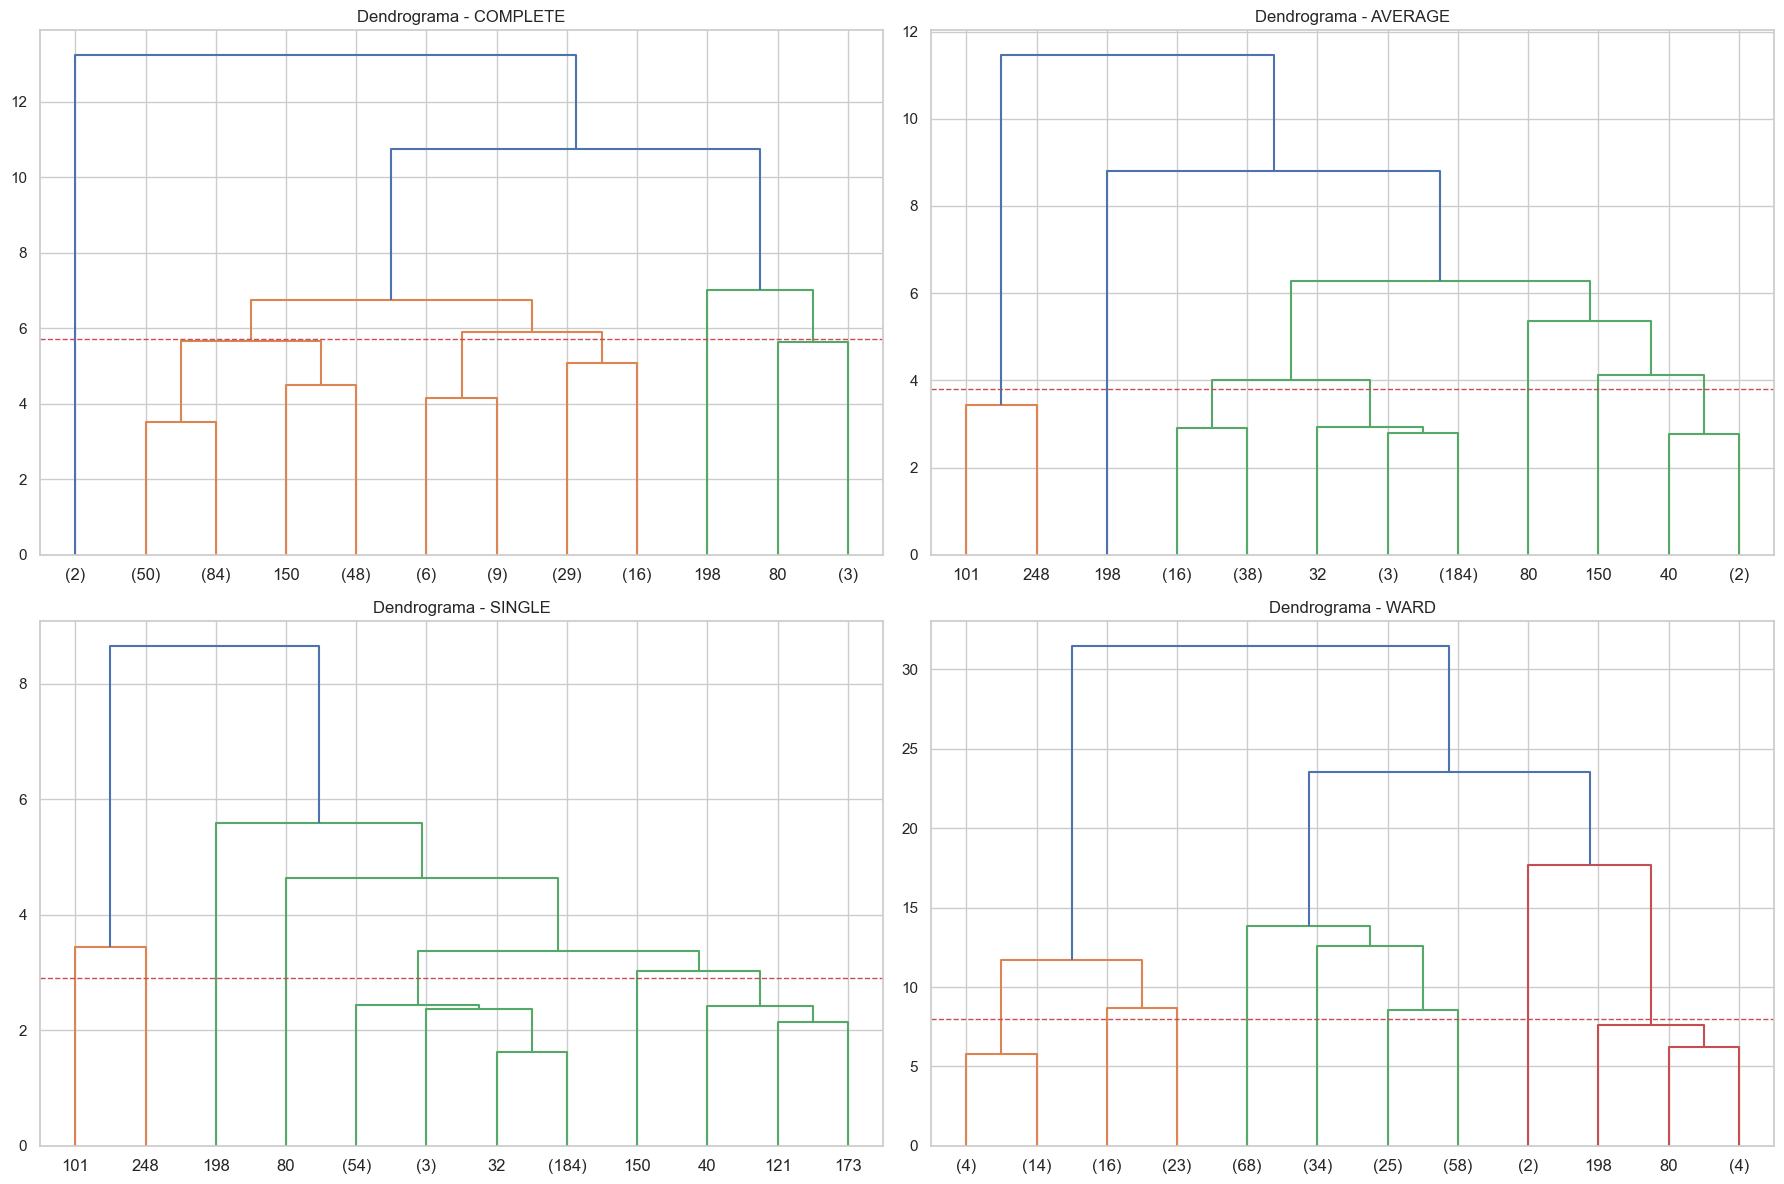


Resumen de clusters:
cluster
0    83
4    68
5    34
1    23
6    18
3    16
2     6
7     2
Name: count, dtype: int64

Variables clave por cluster:

Cluster 0:
population     3.211321e+07
area           4.954923e+05
longitude      5.589727e+01
latitude       3.979021e+00
independent    1.000000e+00
unMember       1.000000e+00
dtype: float64

Cluster 1:
population     227246.521739
area             4486.347826
latitude            5.989817
independent         0.000000
unMember            0.000000
longitude         -94.515270
dtype: float64

Cluster 2:
population     1.249735e+08
area           1.111055e+07
latitude       5.166667e+00
independent    8.333333e-01
unMember       8.333333e-01
longitude     -2.333333e+00
dtype: float64

Cluster 3:
population     596722.187500
area           159426.777500
latitude           46.735675
independent         0.187500
unMember            0.000000
longitude          -6.163767
dtype: float64

Cluster 4:
population     1.611860e+07
area           2.1

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------
# 1. Cargar y preprocesar datos
# --------------------------------------
try:
    df = pd.read_csv('paises_con_lat_lon.csv')
except FileNotFoundError:
    print("Error: Archivo no encontrado. Verifica la ruta del CSV.")
    exit()

# Codificar variables categóricas
le = LabelEncoder()
categorical_cols = ['independent', 'car.side', 'landlocked', 'region']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Selección de features y escalado
features = ['latitude', 'longitude', 'independent', 'area', 'population', 'unMember']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------
# 2. Configuración visual
# --------------------------------------
sns.set_theme(style='whitegrid')  # Estilo moderno de Seaborn
plt.rcParams['figure.figsize'] = (12, 6)

# --------------------------------------
# 3. Clustering Jerárquico (4 métodos)
# --------------------------------------
methods = ['complete', 'average', 'single', 'ward']
n_clusters = 8

# A. Dendrogramas (scipy)
y_values = {'single': 2.9, 'complete': 5.7, 'average': 3.8, 'ward': 8}  # Define tus valores aquí

plt.figure(figsize=(18, 12))
for i, method in enumerate(methods, 1):
    Z = linkage(X_scaled, method=method, metric='euclidean')
    plt.subplot(2, 2, i)
    dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
    plt.title(f'Dendrograma - {method.upper()}')
    
    # Línea punteada con valor específico para cada método
    plt.axhline(y=y_values[method], color='r', linestyle='--', linewidth=1)
    
plt.tight_layout()
plt.show()

best_method = 'ward'
final_cluster = AgglomerativeClustering(
    n_clusters=n_clusters, 
    linkage=best_method, 
    metric='euclidean'  # Aplicar mismo cambio aquí
)
df['cluster'] = final_cluster.fit_predict(X_scaled)


# --------------------------------------
# 5. Interpretación
# --------------------------------------
print("\nResumen de clusters:")
print(df['cluster'].value_counts())

print("\nVariables clave por cluster:")
for cl in range(n_clusters):
    print(f"\nCluster {cl}:")
    print(df[df['cluster'] == cl][features].mean().sort_values(ascending=False))

### Silhouette



In [89]:
from sklearn.metrics import silhouette_score
print("Dataset X K-Means\t", silhouette_score(X, kmeans.labels_))


Dataset X K-Means	 -0.5189634391287054


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

def plot_single_silhouette(dataset, model):
    # Filtra los datos asignados a un cluster válido
    use_indices = model.labels_ >= 0
    use_labels = model.labels_[use_indices]
    use_data = dataset[use_indices]

    # Asegura que use_data sea un NumPy array (evita errores de indexación si es un DataFrame)
    if hasattr(use_data, "values"):
        use_data = use_data.values

    n_clusters = len(np.unique(use_labels))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    silhouette_avg = silhouette_score(use_data, use_labels)
    print(f"The average silhouette_score for {model.__class__.__name__} is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(use_data, use_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[use_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"{model.__class__.__name__}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

    ax2.scatter(use_data[:, 0], use_data[:, 1], c=use_labels)
    ax2.set_title("Cluster visualization")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.tight_layout()
    plt.show()


The average silhouette_score for KMeans is : -0.5189634391287054


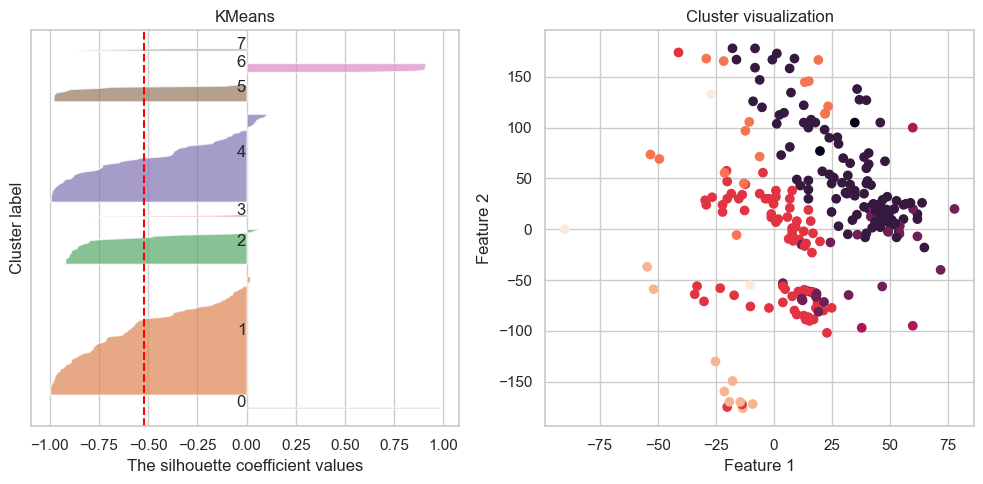

In [91]:
plot_single_silhouette(X, kmeans)

The average silhouette_score for KMeans is : 0.4965926275618911


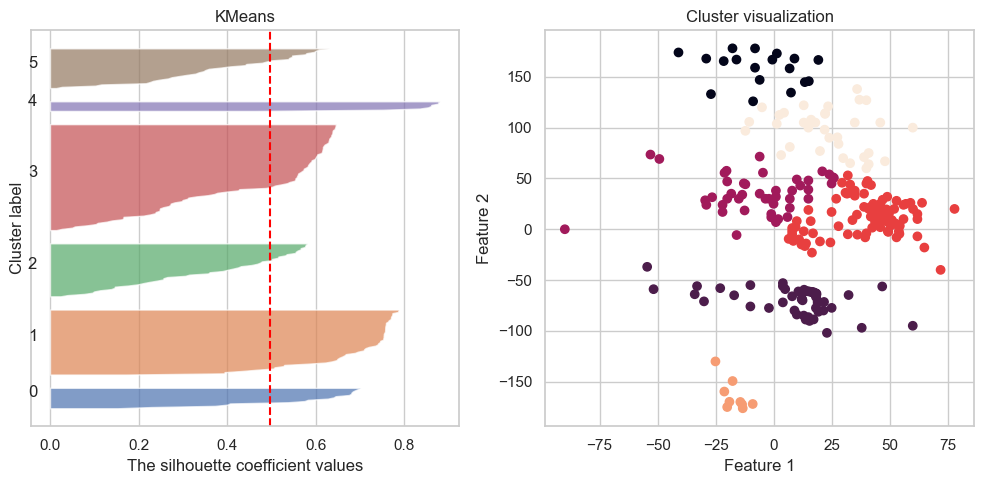

In [92]:
plot_single_silhouette(X_lat_lon, kmeans_lat_lon)